In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
os.getcwd()

'/home/jaeho_ubuntu/Lung/notebook'

In [20]:
IMAGE_DIR = '/home/LUNG_DATA/Image'
MASK_DIR = '/home/LUNG_DATA/Mask'
CLEAN_DIR_IMG ='/home/LUNG_DATA/Clean/Image'
CLEAN_DIR_MASK ='/home/LUNG_DATA/Clean/Mask'
PREDICT_DIR = '/home/LUNG_DATA/Unet_output_data/UNET_with_Augmenetation'

In [21]:
pid_list = os.listdir(PREDICT_DIR)

In [22]:
pid_list[0]

'0385_nodule0_slice14_predict.npy'

In [33]:
def view_img(MASK_DIR,PREDICT_DIR,IMAGE_DIR):
    
    for prediction in os.listdir(PREDICT_DIR):
        pid = 'LIDC-IDRI-'+prediction[:4]
        mask_id = prediction[:-12].replace('nodule','mask')
        
        original_img= np.load(IMAGE_DIR+'/'+pid+'/'+prediction[:-12]+'.npy')
        mask_img= np.load(MASK_DIR+'/'+pid+'/'+mask_id+'.npy')
        predict_mask =np.load(PREDICT_DIR+'/'+prediction)

        fig,ax = plt.subplots(1,3, figsize=(15,15))
        print(pid)
        ax[0].title.set_text('Original image')
        ax[0].imshow(original_img)
        ax[0].grid()
        ax[1].title.set_text('Mask image')
        ax[1].imshow(mask_img)
        ax[1].grid()
        ax[2].title.set_text('Predicted Mask image')
        ax[2].imshow(predict_mask)
        ax[2].grid()
        plt.show()


LIDC-IDRI-0385


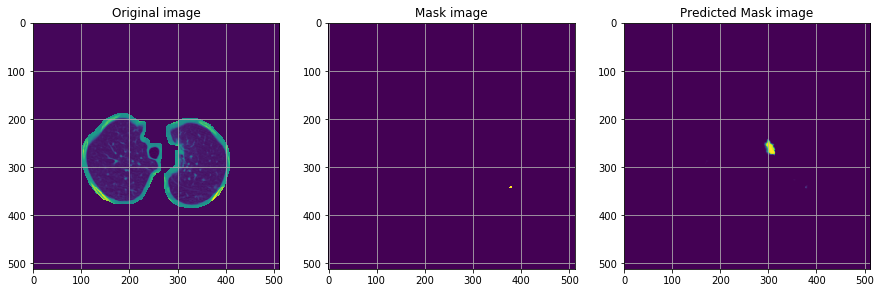

LIDC-IDRI-0741


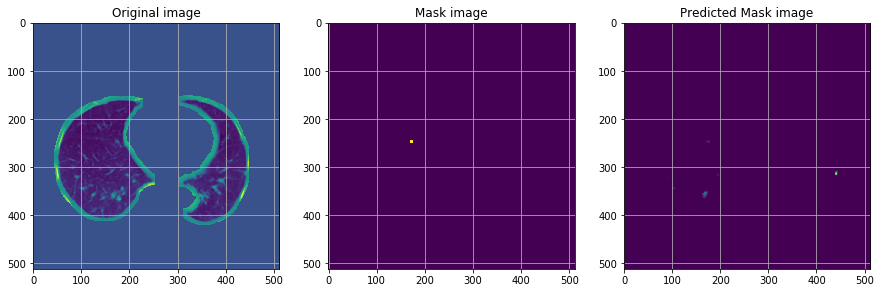

LIDC-IDRI-0845


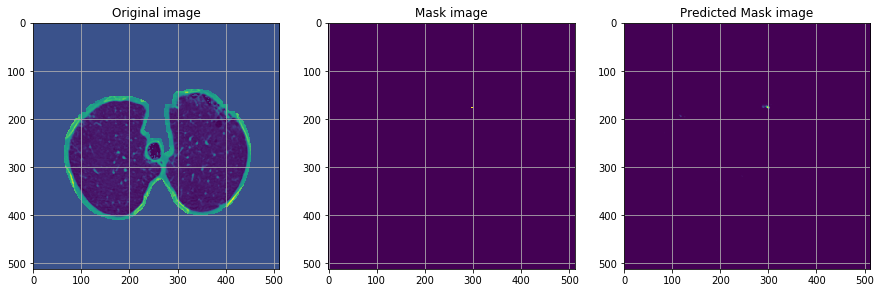

LIDC-IDRI-0415


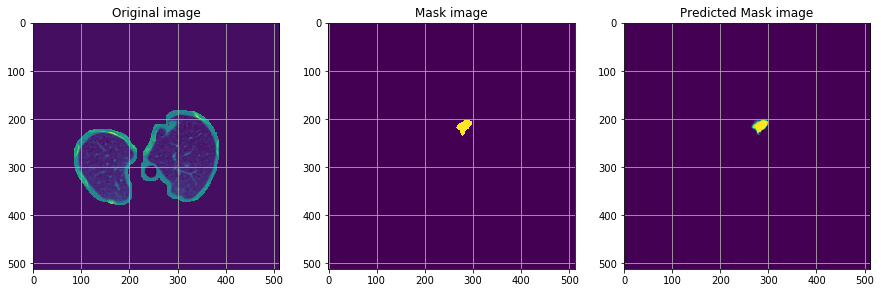

LIDC-IDRI-0844


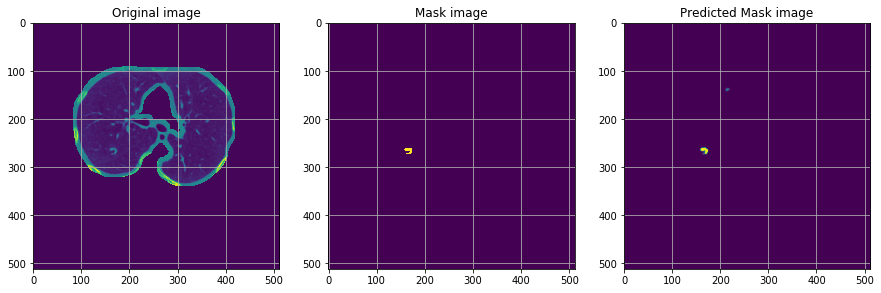

LIDC-IDRI-0810


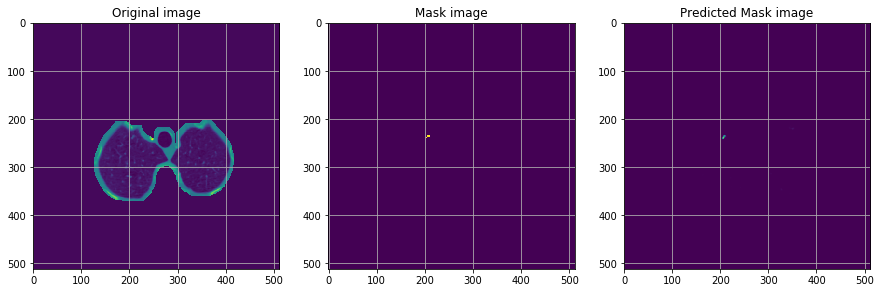

In [34]:
view_img(MASK_DIR,PREDICT_DIR,IMAGE_DIR)

In [ ]:
MASK_DIR= '../data/Mask'
IMAGE_DIR='../data/Image'
PREDICT_DIR =

In [ ]:
'/home/LUNG_DATA/Unet_output_data'